<a href="https://colab.research.google.com/github/jayabban/Data-Science/blob/main/Pneumonia_Chest_X_Ray_Detection(50epoch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import BatchNormalization,Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data preprocessing

Preprocessing the Trainning set |
We apply some transformation on our trainning image set only to avoid overfitting (Image Augmentation)

*   Rotation
*   Zoom in and zoom out etc

Feature scalling is always compulsory in Neural Network



In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Kaggle Dataset/Health_Related_Data/Data_chest_xray/train',classes=('NORMAL','PNEUMONIA'),
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


Preprocessing the test set

Batch_size: how many images do we want in each batch

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Kaggle Dataset/Health_Related_Data/Data_chest_xray/test', classes=('NORMAL','PNEUMONIA'),
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


# **Building the CNN**

# **Function**

In [5]:
from tensorflow import keras
cnn = tf.keras.models.Sequential()

# **Convolution**

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
# cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

# **Pooling**

In [7]:
cnn.add(tf.keras.layers.MaxPool2D((3,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# **Addind a second convolutional layer**

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64, padding="same", kernel_size=(3,3),activation='relu'))
# cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# **Adding a third convolutional layer**

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128, padding="same", kernel_size=(3,3),activation='relu'))
# cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# **Flattening**

**This is the layer that will help us transform our feature map from 2D - 1D**

In [10]:
cnn.add(tf.keras.layers.Flatten())

# **Full Connection**

In [11]:
cnn.add(tf.keras.layers.Dense(1000, activation='relu'))
cnn.add(Dropout(0.2))

# **Output Layer**

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# **Trainning the CNN**

### Compiling

In [13]:
# opt = SGD(learning_rate=0.001)
cnn.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 dropout (Dropout)           (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

### Trainning the CNN on the trainning set and evaluating it on the test set

In [15]:
# cnn.fit(x = training_set, validation_data = test_set, epochs = 100)
history = cnn.fit(x = training_set, validation_data= test_set, steps_per_epoch= 3, epochs = 50, validation_steps = 3, verbose=2)

Epoch 1/50
3/3 - 44s - loss: 2.5850 - accuracy: 0.7500 - val_loss: 0.6151 - val_accuracy: 0.7396 - 44s/epoch - 15s/step
Epoch 2/50
3/3 - 15s - loss: 0.6766 - accuracy: 0.4688 - val_loss: 0.6911 - val_accuracy: 0.6354 - 15s/epoch - 5s/step
Epoch 3/50
3/3 - 14s - loss: 0.6447 - accuracy: 0.6979 - val_loss: 0.6991 - val_accuracy: 0.5312 - 14s/epoch - 5s/step
Epoch 4/50
3/3 - 14s - loss: 0.5370 - accuracy: 0.7708 - val_loss: 0.7117 - val_accuracy: 0.6042 - 14s/epoch - 5s/step
Epoch 5/50
3/3 - 15s - loss: 0.6491 - accuracy: 0.7292 - val_loss: 0.6279 - val_accuracy: 0.6875 - 15s/epoch - 5s/step
Epoch 6/50
3/3 - 15s - loss: 0.6237 - accuracy: 0.6979 - val_loss: 0.6723 - val_accuracy: 0.5938 - 15s/epoch - 5s/step
Epoch 7/50
3/3 - 16s - loss: 0.5794 - accuracy: 0.7708 - val_loss: 0.6646 - val_accuracy: 0.6042 - 16s/epoch - 5s/step
Epoch 8/50
3/3 - 16s - loss: 0.5790 - accuracy: 0.7292 - val_loss: 0.6519 - val_accuracy: 0.6354 - 16s/epoch - 5s/step
Epoch 9/50
3/3 - 14s - loss: 0.5549 - accuracy:

**Save Model**

In [16]:
# cnn.save('Chest_X-Ray_cnn_model.h5')

# **Ploting using Matplotlib**

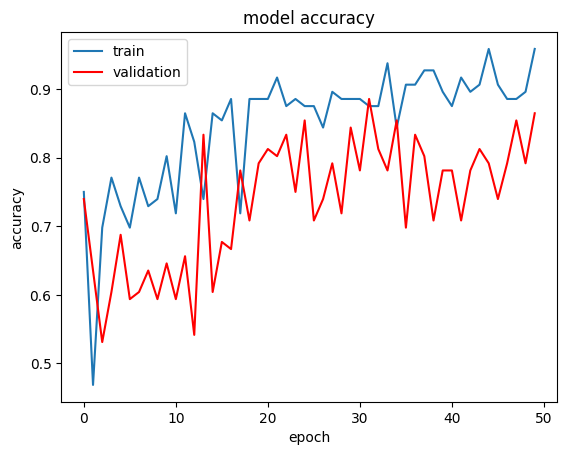

In [17]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

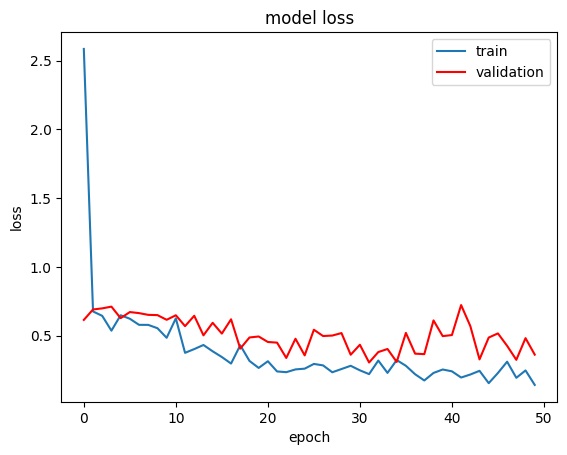

In [18]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show()

# **Prediction**

In [19]:
predictions = cnn.predict(test_set)
y_pred = (predictions > 0.5).astype(int)

20/20 [==============================] - 24s 1s/step


# **Evaluation**

In [20]:
from sklearn.metrics import classification_report
train_score = cnn.evaluate(training_set, batch_size=32)
test_score = cnn.evaluate(test_set, steps=test_set.samples, batch_size=32)

print("Train Loss:", train_score[0])
print("Train Accuracy:", train_score[1])
print('-' * 20)
print("Test Loss:", test_score[0])
print("Test Accuracy:", test_score[1])
print('-' * 20)


print(classification_report(test_set.classes, y_pred, target_names=["Normal", "Pneumonia"]))

 20/624 [..............................] - ETA: 11:36 - loss: 0.4041 - accuracy: 0.8109

624/624 [==============================] - 24s 35ms/step - loss: 0.4041 - accuracy: 0.8109
Train Loss: 0.24639225006103516
Train Accuracy: 0.9141104221343994
--------------------
Test Loss: 0.40413349866867065
Test Accuracy: 0.8108974099159241
--------------------
              precision    recall  f1-score   support

      Normal       0.40      0.27      0.32       234
   Pneumonia       0.63      0.75      0.69       390

    accuracy                           0.57       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.54      0.57      0.55       624



In [21]:
# batch_images, batch_labels = next(test_set)

# fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(12,8),subplot_kw={'xticks':[],'yticks':[]})

# for i, ax in enumerate(axes.flat):
#     ax.imshow(batch_images[i])
#     ax.set_title(f"True:{test_set.classes[i]}\n Predicted:{predictions[i]}")

# plt.tight_layout()
# plt.show()


# **Confusion Matrix**

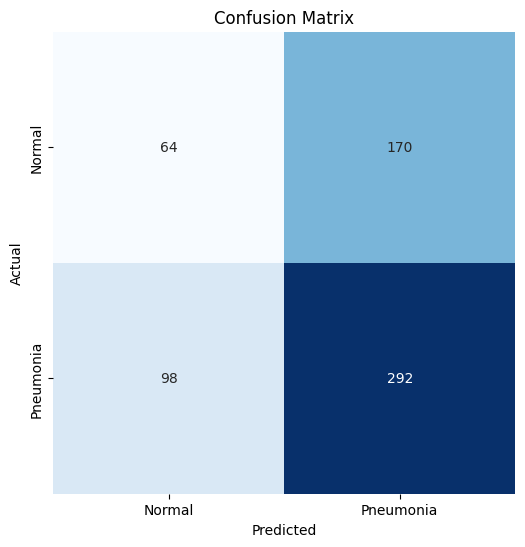

In [22]:
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(test_set.classes, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Predict_also**

In [23]:
# batch_size = test_set.batch_size
# num_batches = 1

# for i in range(num_batches):
#     x, y = next(test_set)
#     predictions = cnn.predict(x)

#     for j in range(min(batch_size, 8)):
#         image = x[j]
#         plt.imshow(image)
#         plt.show()
#         print('The probability of Pneumonia is: ', predictions[j])

In [39]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Kaggle Dataset/Health_Related_Data/Data_chest_xray/predict/Normal_or_Abnormal_6.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#Performing Single Predictions

result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] > 0.5:
    prediction = 'Pneumonia'
else:
    prediction = 'Normal'
print(prediction)




1/1 [==============================] - 0s 52ms/step
Pneumonia


# **Save Model**

In [25]:
my_model = cnn.save('pneumonia_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
